In [7]:
import numpy as np
import pandas as pd
import glob
from model.ctabgan import CTAB_XTRA_DP
df = pd.read_csv("datasets/car.csv")
df = df.drop(columns=['Model'])

In [8]:

#df.iloc[0, 1] = np.nan
df = df[['Brand', 'Engine_Size', 'Mileage',"Year","Price"]]
df = df.head(1000)

In [9]:
df.head()

,Brand,Engine_Size,Mileage,Year,Price
0,Kia,4.2,289944,2020,8501
1,Chevrolet,2.0,5356,2012,12092
2,Mercedes,4.2,231440,2020,11171
3,Audi,2.0,160971,2023,11780
4,Volkswagen,2.6,286618,2003,2867


In [10]:
synthesizer =  CTAB_XTRA_DP(df,
                 categorical_columns = ["Brand"], 
                 integer_columns = ["Mileage"],
                 general_columns=["Mileage"],
                 problem_type= ("Regression", 'Price')
                 )

In [ ]:
synthesizer.fit(10)

Start training with 200 epochs
 5 critic iterations
 2 steps per epoch
 batch size 500
Using auxilarary classifier. Problem type: Regression, target: Price


 12%|█▏        | 24/200 [00:34<04:11,  1.43s/it]


KeyboardInterrupt: 

In [ ]:
syn = synthesizer.generate_samples(1000)
syn.head(20)


,Brand,Engine_Size,Mileage,Year,Price
0,Kia,3.2,42211,2012,9596
1,Toyota,3.7,144828,2007,13086
2,Kia,3.1,69444,2021,15204
3,Kia,1.8,199862,2017,3759
4,BMW,2.5,192720,2005,5448
5,Ford,3.1,108493,2014,11027
6,Chevrolet,3.1,169489,2004,11426
7,Mercedes,2.4,34375,2020,13238
8,Ford,2.3,187657,2017,8628
9,Mercedes,2.1,270664,2000,1993


In [ ]:
from model.eval.evaluation import get_summary_metrics
utility, similarity, privacy = get_summary_metrics(df,syn,categorical=["Brand"],problem="regression")

In [ ]:
utility_real = utility[0]
utility_fake = utility[1][0]
print(utility_real)
print(utility_fake)

         MAPE  Explained Variance  R2 Score
dt   0.174199            0.739222  0.734775
rf   0.140423            0.862666  0.858523
hgb  0.142959            0.854077  0.851093
cat  0.140068            0.866513  0.862300
xgb  0.158143            0.826769  0.823653
         MAPE  Explained Variance  R2 Score
dt   0.397276           -0.127982 -0.135454
rf   0.298551            0.479051  0.476457
hgb  0.282373            0.520674  0.519013
cat  0.304663            0.421463  0.420255
xgb  0.337740            0.292018  0.290751


In [ ]:
summary, column_similarity, corr = similarity

print(summary)
print("\n")
print(column_similarity)
print("\n")
print("Difference in correlation:",corr)

  Metric  Weighted_Avg      Mean      Std
0    JSD      0.058539  0.058539      NaN
1     WD      0.020688  0.020688  0.00734


        Column Metric  Distance  Weight
0        Brand    JSD  0.058539     1.0
1  Engine_Size     WD  0.028650     1.0
2      Mileage     WD  0.019081     1.0
3         Year     WD  0.023652     1.0
4        Price     WD  0.011367     1.0


Difference in correlation: 0.07830557342230529


In [ ]:
percentiles, nnaa, privacy_score = privacy

In [ ]:
print(percentiles)
print("\n")
print(nnaa)
print("\n")
print("Privacy score:",privacy_score)

                rr        ff        rf
nndr_5th  0.403106  0.422898  0.423554
dcr_5th   0.039911  0.051729  0.046139


0.5333333333333333


Privacy score: 1.0069654557182697


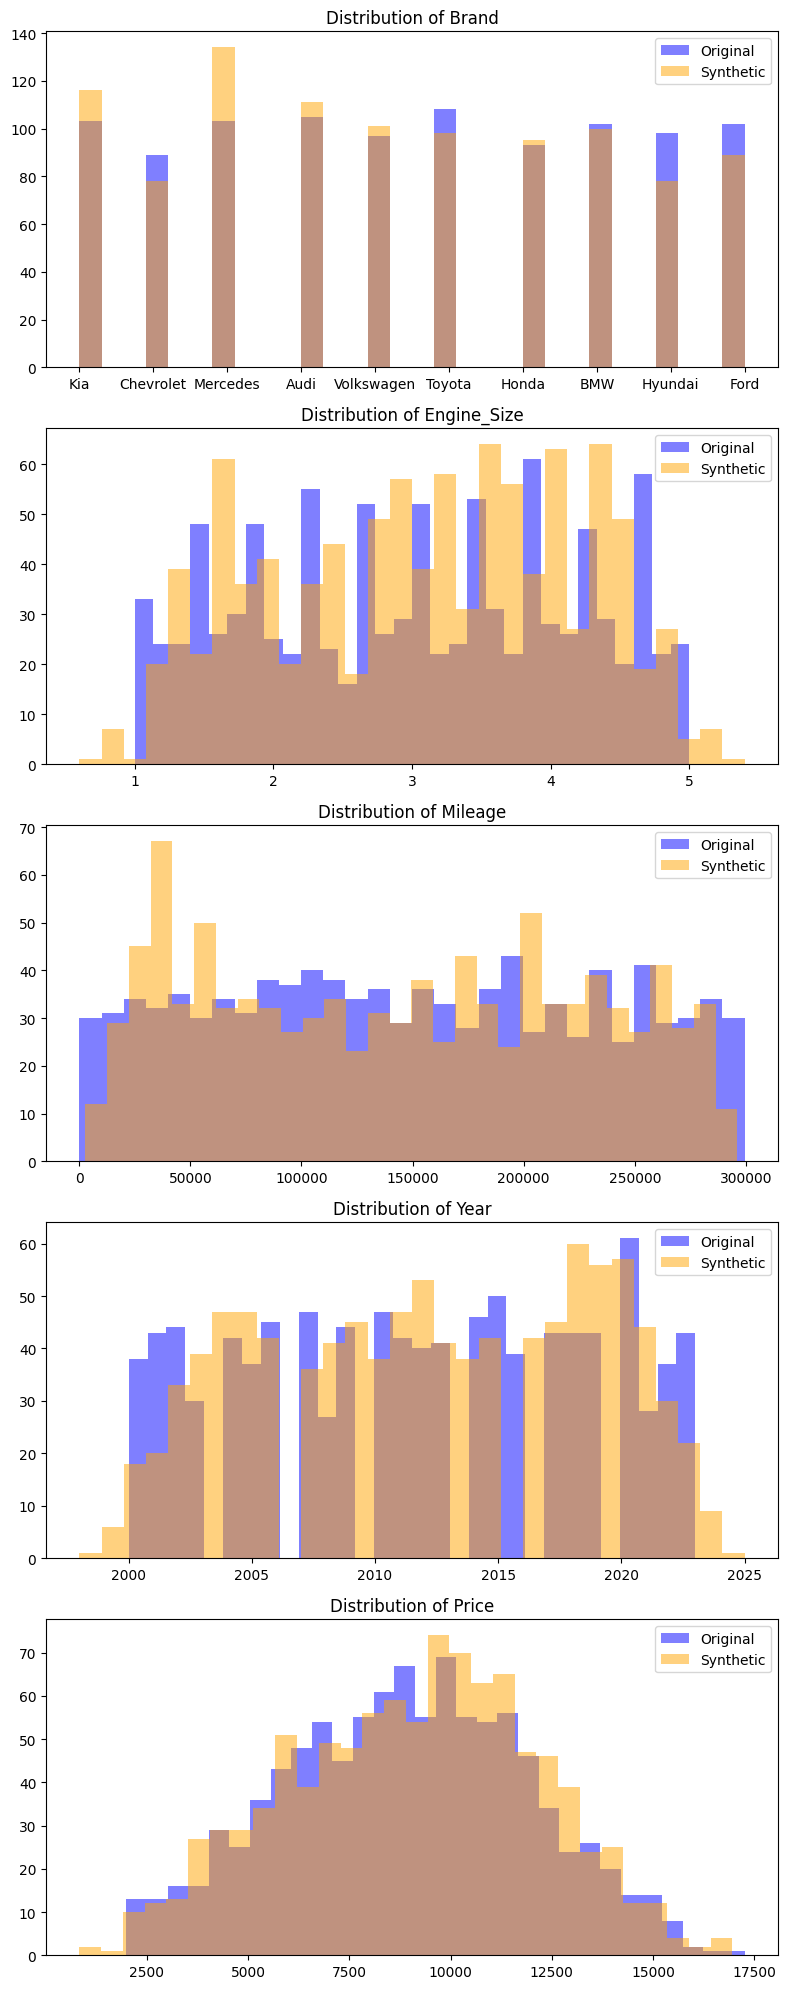

In [ ]:
import matplotlib.pyplot as plt

columns = df.columns
num_columns = len(columns)

fig, axes = plt.subplots(num_columns, 1, figsize=(8, 4 * num_columns))

for i, column in enumerate(columns):
    axes[i].hist(df[column], bins=30, alpha=0.5, label='Original', color='blue')
    axes[i].hist(syn[column], bins=30, alpha=0.5, label='Synthetic', color='orange')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].legend()

plt.tight_layout()
plt.show()